In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from utils import dataset, distance, error, regression, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

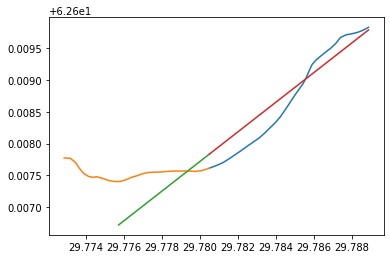

In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1393786760018)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.5)

head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

slope, intercept, _r_value, _p_value, _std_err = linregress(head_y, head_x)
regression_line = np.array(list(zip(intercept + slope * head_y, head_y)))
reg_x, reg_y = regression_line[:, 0], regression_line[:, 1]

prediction = regression.predict_with_linear_regression(head, 60)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

plt.plot(head_y[-32:], head_x[-32:])
plt.plot(tail_y[:32], tail_x[:32])
plt.plot(pred_y, pred_x)
plt.plot(reg_y[-32:], reg_x[-32:])
plt.show()